# Limpieza de datos: Libere - Reto06

**CARGA DE LIBRERIAS**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import os
import datetime as datetime

**DESCARGA DE DATOS**

In [3]:
path = os.path.join('Datos', 'Originales', 'cancellation_data_for_mondragon_unibertsitatea_2024.csv')
df = pd.read_csv(path)

In [4]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


In [5]:
df.shape

(56448, 36)

In [6]:
df.columns

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')

In [7]:
df.dtypes

booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


**Conversión de Fechas a tipo Fecha**

In [8]:
formato = "%b %d, %Y, %H:%M"

df["booked_at"] = pd.to_datetime(df["booked_at"], format=formato, errors="coerce")
df["checkin_time"] = pd.to_datetime(df["checkin_time"], format=formato, errors="coerce")
df["checkout_time"] = pd.to_datetime(df["checkout_time"], format=formato, errors="coerce")
df["asset_opening_date"] = pd.to_datetime(df["asset_opening_date"], format=formato, errors="coerce")

In [9]:
df.dtypes

booked_at                       datetime64[ns]
checkin_time                    datetime64[ns]
checkout_time                   datetime64[ns]
lead_time                                int64
lenght_of_stay                           int64
checkin_month                           object
checkin_day                             object
adult_count                              int64
child_count                              int64
origin                                  object
travel_agency_name                      object
requested_category                      object
requested_category_name                 object
asset                                   object
asset_type                              object
brand                                   object
asset_opening_date              datetime64[ns]
available_units                          int64
business_segment                        object
rate                                    object
rate_group_name                         object
rate_type    

**DUPLICADOS**

In [10]:
df.duplicated() # Filas completamente duplicadas

0        False
1        False
2        False
3        False
4        False
         ...  
56443    False
56444    False
56445    False
56446    False
56447    False
Length: 56448, dtype: bool

In [11]:
df[df.duplicated()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
63,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,yes,1,25.16,25.16,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
65,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,yes,1,25.16,25.16,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
66,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,no,0,21.07,21.07,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
83,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,4,0,email,...,1,no,yes,4,274.53,91.51,checked_out,NaN,NaN,NaN
85,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,3,0,email,...,1,no,yes,4,251.34,83.78,checked_out,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,yes,1,154.76,154.76,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56143,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,yes,1,154.76,154.76,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56144,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,no,0,141.38,141.38,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56181,2023-03-03 19:39:00,2023-11-23 15:00:00,2023-11-25 11:00:00,265,2,November,Thursday,2,0,channel_manager,...,1,no,no,0,430.79,215.4,cancelled,"Nov 15, 2023, 21:13",changed_plans,257.0


**MISSINGS**

In [12]:
df.isna()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [13]:
#Cuantos NA hay por cada columna
df.isna().sum(axis = 0)

booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              18106
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      3276
all_entry_forms_completed           0
last_entry_form_completed_at    15948
returning_inhabitant                0
recurrence  

In [14]:
#Las columnas con más NAs
tabla_nas_columnas =  df.isna().sum()#Muestra cuantas columnas tienen NA
tabla_nas_columnas [tabla_nas_columnas>0]

travel_agency_name              18106
completed_entry_forms_count      3276
last_entry_form_completed_at    15948
total_adr                           1
cancelled_at                    41853
cancellation_reason             41853
cancellation_lead_time          41853
dtype: int64

In [15]:
#Cuantos NA hay por cada fila
df.isna().sum(axis = 1)

0        3
1        3
2        3
3        3
4        3
        ..
56443    3
56444    3
56445    4
56446    4
56447    1
Length: 56448, dtype: int64

<Axes: >

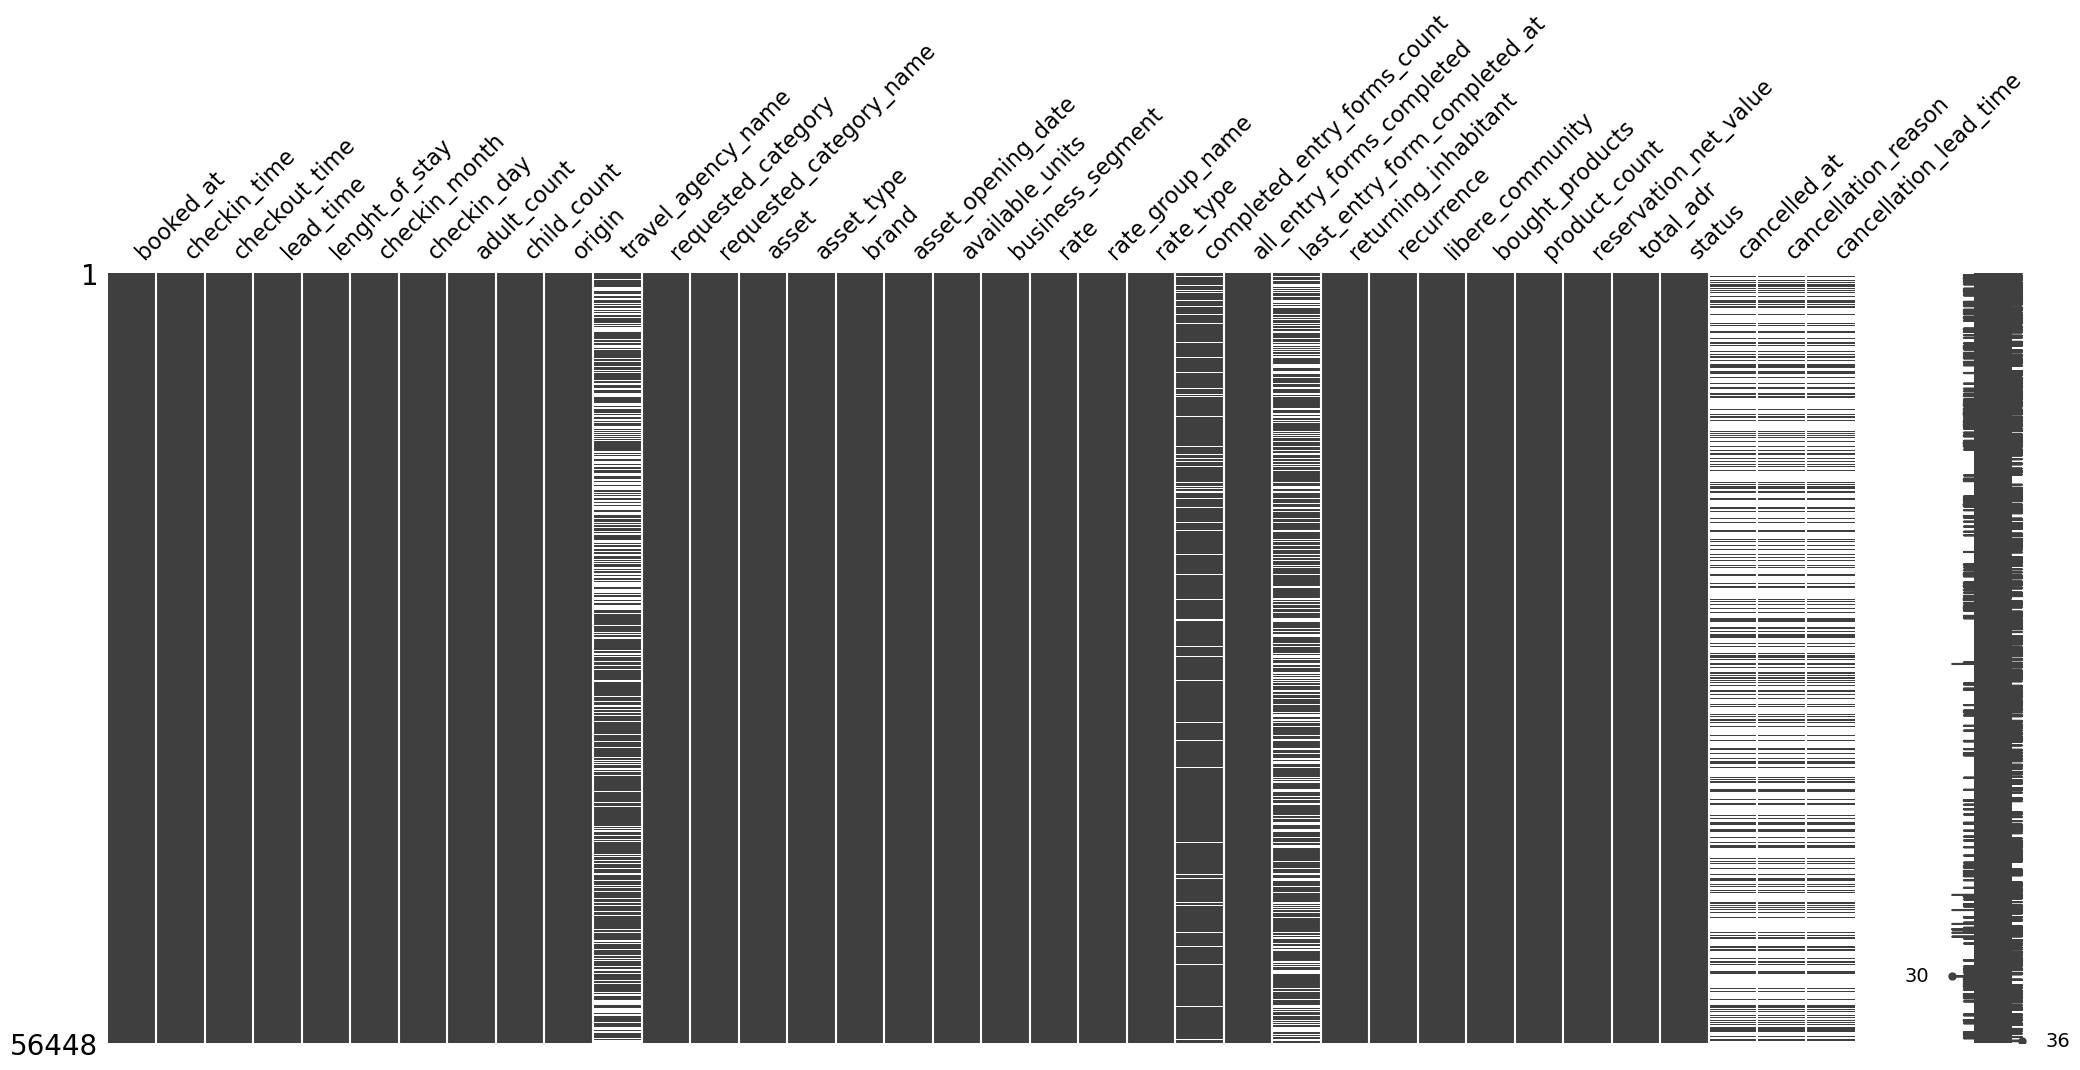

In [16]:
msno.matrix(df)

<Axes: >

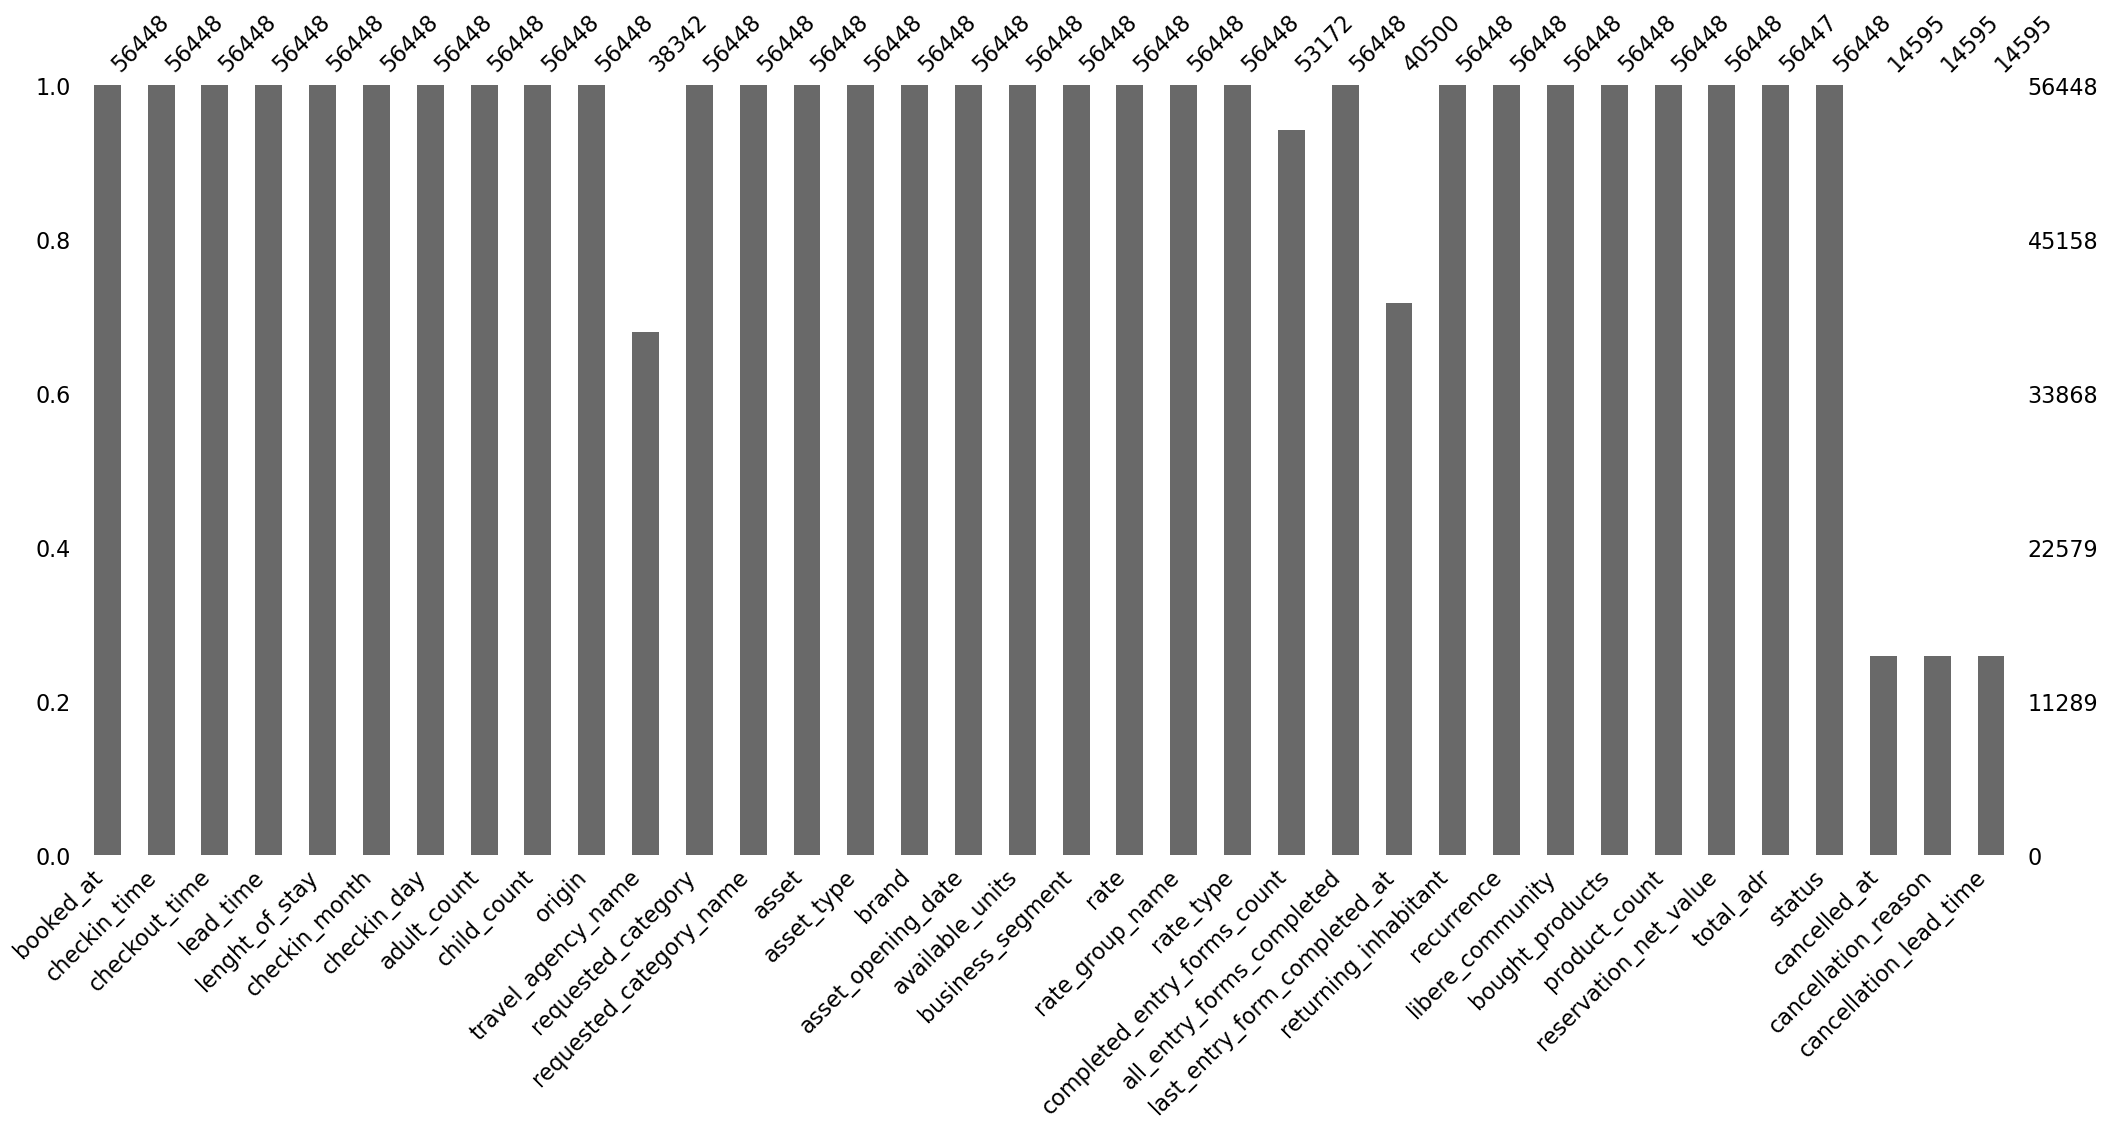

In [17]:
msno.bar(df) # Instancias completas

Correlación entre missings

<Axes: >

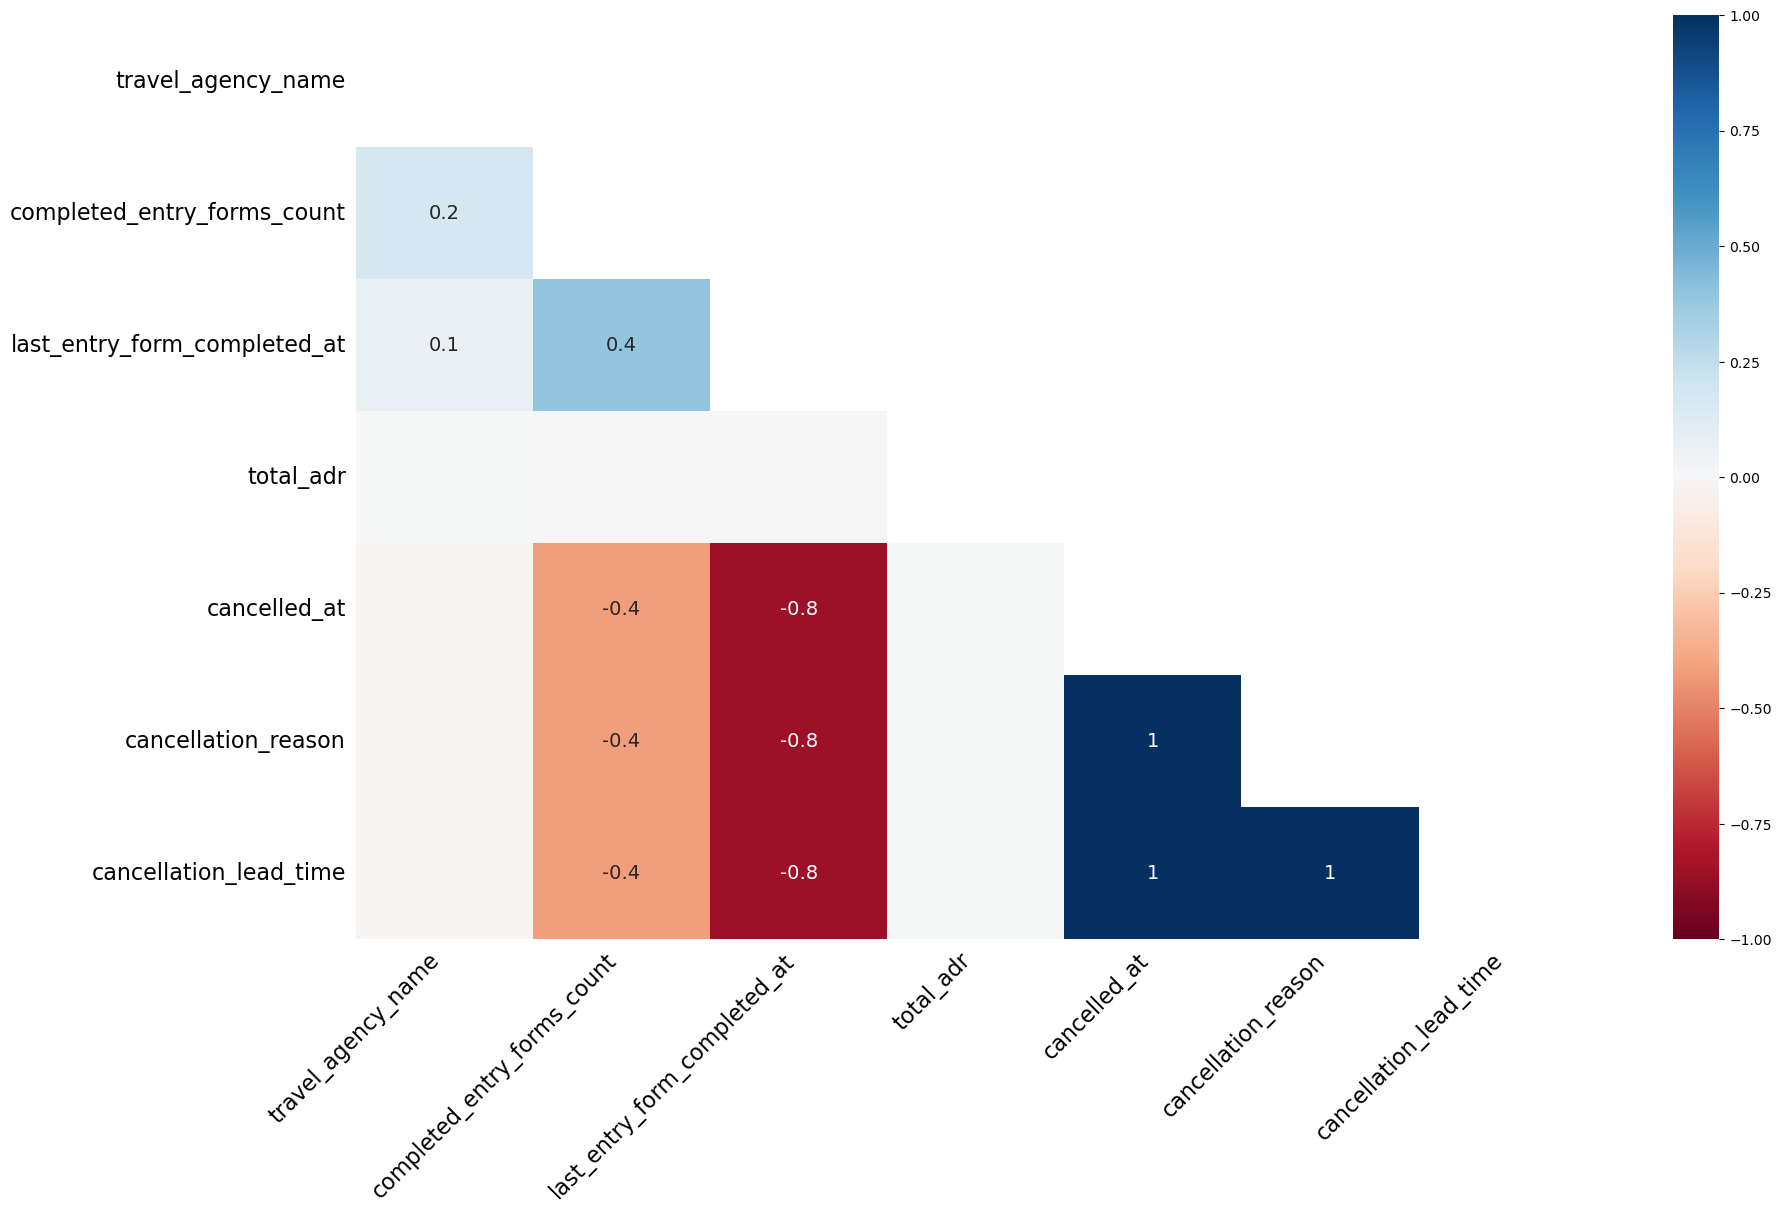

In [18]:
msno.heatmap(df) 

**Tratamientos de missings**

### -------   IMPUTACIONES  de las Variables con NA-s

##### Imputacion Variables: `Cancellation_reason, Cancellation_lead_time, Cancelled_at`
##### (Las hemos imputado con "not_cancelled" o 0 en cado de la de lead_time)

In [ ]:
####### leadtime = 1900-01-01
# cancelled_at = 1900-01-01

In [19]:
#Rellenar los NA de estas columnas con "not_cancelled" o "0"
df["cancellation_reason"].fillna("not_cancelled", inplace=True)
df["cancellation_lead_time"] = df["cancellation_lead_time"].fillna(0)
df["cancelled_at"].fillna("not_cancelled", inplace=True)

C:\Users\Larau\AppData\Local\Temp\ipykernel_59164\3946183878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cancellation_reason"].fillna("not_cancelled", inplace=True)
C:\Users\Larau\AppData\Local\Temp\ipykernel_59164\3946183878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [20]:
# Comprobar si siguen quedando NA-s
tabla_nas_columnas1 =  df.isna().sum()
tabla_nas_columnas1 [tabla_nas_columnas1>0]

#Siguen quedando NA-s en las columnas "travel_agency", "completed_entry_forms_count", "last_entry_form_completed_at"

travel_agency_name              18106
completed_entry_forms_count      3276
last_entry_form_completed_at    15948
total_adr                           1
dtype: int64

##### Imputacion Variable: `travel_agency`
###### Tras analizar los NA de esta varibales se ha concluido que es por la razon de que la reserva se ha realizado, en persona,email,telefono..


In [42]:
df["travel_agency_name"].fillna("agency_no_registrada", inplace=True)


C:\Users\Larau\AppData\Local\Temp\ipykernel_59164\1324663103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["travel_agency_name"].fillna("agency_no_registrada", inplace=True)


##### Imputacion Variable: `completed_entry_forms_count`
###### Se imputó según `all_entry_forms_completed`. Si esta era "no", significa que no se ha completado ningún informe, por lo que asignamos 0.Ademas se ha actualizado "all_entry_forms_completed" a "yes" si hay algún informe completado



In [ ]:
#Imputar los valores NA-s:
df.loc[df["all_entry_forms_completed"] == "no", "completed_entry_forms_count"] = 0

In [ ]:
#Identificar los que "all_entry_forms_completed" son "no" pero han realizado algun test, es decir, que "completed_entry_forms_count" != 0
df["completed_entry_forms_count"] = pd.to_numeric(df["completed_entry_forms_count"], errors="coerce")
df.loc[df["completed_entry_forms_count"] > 0, "all_entry_forms_completed"] = "yes"

#Comprobar que se ha realizado correctamente:
cantidad_no_no0 = df[(df["completed_entry_forms_count"] > 0) & (df["all_entry_forms_completed"] == "no")].shape[0]
print(f'Quedan {cantidad_no_no0} de casos en el que "completed_entry_forms" es mayor que 0 y "all_entry_forms" y es igual a "no". Por lo que esta correctamnete hecho!')

Quedan 0 de casos en el que "completed_entry_forms" es mayor que 0 y "all_entry_forms" y es igual a "no". Por lo que esta correctamnete hecho!


##### Imputacion Variable : `last_entry_form_completed_at`
###### Imputaremos los valores NA-s de esta variable con una fecha “neutral” en este caso ("1900-01-01")

In [32]:
df["last_entry_form_completed_at"].fillna(pd.Timestamp("1900-01-01"), inplace=True)

##### Imputacion Variable: `total_adr`
###### Solo hya un NA-s y se ha imputado como 0 debido a que la variable "reservation_net_value" era 0

In [ ]:
#Hay un NA en esta variable y es devido a que la variable "reservation_net_value" es 0. POr loq eu esta tmabien se imputara como 0
df["total_adr"].fillna(0, inplace=True)